In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 다시 실행

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/kaggle/input/castone-rf-and-clustering/traindata.csv', encoding = 'euc-kr')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data['key'].max()

# 모델 1 : 예매 취소 여부를 기준으로 고객 분류

- 수익(예매 유지)와 위험(예매 취소)로 분류

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data[['성별','topic','공연분기','나이','층','멤버십요금','할인율','discount_ticket_num',
          '예매구간', '주말여부', '휴식비율']]
Y = data[['예매취소여부']]

In [ ]:
df_dummies = pd.get_dummies(X[['성별','topic','공연분기']], drop_first=True)
x_con = X[['나이','층','멤버십요금','할인율','discount_ticket_num',
          '예매구간', '주말여부', '휴식비율']]

# 더미 변수와 연속형 변수를 합치기
df_combined = pd.concat([x_con, df_dummies], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined, Y, test_size=0.3, random_state=1234)
rf1_model = RandomForestClassifier(n_estimators=150, random_state=1234)
rf1_model.fit(X_train, y_train)

y_pred = rf1_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'정확도: {accuracy}')
print('분류 보고서:')
print(classification_rep)

In [ ]:
# 변수 중요도 출력
feature_importances = rf1_model.feature_importances_

# 중요도를 데이터프레임으로 변환하여 출력
df_importances = pd.DataFrame({'Feature': df_combined.columns, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

print("Variable Importances:")
print(df_importances)

## 모델 1 저장

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
import joblib

In [ ]:
joblib.dump(rf1_model, 'rf1_model.pkl')

In [ ]:
rf1_model_load = joblib.load('rf1_model.pkl')

In [ ]:
y_pred = rf1_model_load.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'정확도: {accuracy}')
print('분류 보고서:')
print(classification_rep)

# RandomForest 2 : 저수익-고수익 구분

In [ ]:
model_data = data[data['예매취소여부']==0]

In [ ]:
def create_Y(value):
  global price
  if value <= price:
    return 0 #저수익
  else:
    return 1 #고수익

## 가격구간별 모델 설정

In [ ]:
df_dummies = pd.get_dummies(model_data[['성별', 'topic', '공연분기', '공연일분류']], dtype = int, drop_first=True)
x_con = model_data[['key', '나이', '층','멤버십요금','할인율', 'discount_ticket_num', '예매구간', '주말여부', '휴식비율']]

# 더미 변수와 연속형 변수를 합치기
X_model2 = pd.concat([x_con, df_dummies], axis=1)
X_model2.head()

In [ ]:
X_model2.shape

In [ ]:
X_model2['key'].max()

#### hold-out cv

In [ ]:
# #하이퍼파라미터 조정

# ls_price = [70000, 75000, 80000,85000,90000,95000,100000,102000] # 50% ~ 75% 범위를 5,000원 가격으로 이동

# val_pred = []

# for price in ls_price:
#   Y_model2 = model_data['실제지불가격'].apply(create_Y)

#   # train, test 분리
#   X_train, X_test, y_train, y_test = train_test_split(X_model2, Y_model2, stratify = Y_model2 ,test_size=0.3, random_state=1234)

#   # train set 분리
#   X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size=0.3, random_state=1234)
#   rf2_model = RandomForestClassifier(n_estimators=100, random_state=1234)
#   rf2_model.fit(X_train, y_train)

#   y_pred = rf2_model.predict(X_val)
#   val_pred.append(y_pred)
#   accuracy = accuracy_score(y_val, y_pred)
#   classification_rep = classification_report(y_val, y_pred)
#   print(accuracy)

#   Y_model2, price, rf2_model = None, 0, None;

In [ ]:
# train_rf = None
# train_rf = pd.DataFrame({'key': X_val['key'], '나이': X_val['나이']})

# for i in range(len(val_pred)):
#     train_rf[f'prediction{i+1}'] = val_pred[i].flatten()
    
# train_rf

In [ ]:
# display(model_data.shape)
# display(X_train.shape)
# display(y_train.shape)
# display(X_test.shape)
# display(y_test.shape)
# display(X_val.shape)
# display(y_val.shape)

In [ ]:
#X_val에 대한 predicted target values
y_pred

In [ ]:
X_val

#### K-fold CV

In [ ]:
# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# from sklearn import ensemble
# #모델링

# ls_price = [70000, 75000, 80000,85000,90000,95000,100000,102000] # 50% ~ 75% 범위를 5,000원 가격으로 이동

# for price in ls_price:
#   Y_model2 = model_data['실제지불가격'].apply(create_Y)
#   X_train, X_test, y_train, y_test = train_test_split(X_model2, Y_model2, stratify = Y_model2 ,test_size=0.3, random_state=1234)

#   #Stratified K-fold  
#   kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
#   cnt = 1
#   # split()  method generate indices to split data into training and test set.
#   for train_index, test_index in kf.split(X_train, y_train):
#       print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#       cnt+=1
#   score = cross_val_score(ensemble.RandomForestClassifier(random_state= 1234), X_train, y_train, cv= kf, scoring="accuracy")
#   print(f'Scores for each fold are: {score}')
#   print(f'Average score: {"{:.2f}".format(score.mean())}')

#   #하이퍼파라미터 조정
#   n_estimators = [50, 100, 150, 200, 250, 300, 350]

#   for val in n_estimators:
#       score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 1234), X_train, y_train, cv= kf, scoring="accuracy")
#       print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

#   Y_model2, price, rf2_model = None, 0, None;

# ★ 전체 모델(8종) 적용 (K-fold 적용 모델)

In [ ]:
ls_price = [70000, 75000, 80000,85000,90000,95000,100000,102000] # 50% ~ 75% 범위를 5,000원 가격으로 이동
col_name = ['prediction_1', 'prediction_2', 'prediction_3', 'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7', 'prediction_8']
y_val_pre = []

for price, col in zip(ls_price, col_name):

  Y_model2 = model_data['실제지불가격'].apply(create_Y)

  # 모델 생성
  X_train, X_test, y_train, y_test = train_test_split(X_model2, Y_model2, test_size=0.3, random_state=1234)
  kfold = KFold(n_splits=5, shuffle=True, random_state=1234) # K-fold 모델 생성

  rf2_model = RandomForestClassifier(n_estimators=100) # RF 모델 정의(하이퍼파라미터는 동일하게 투입)
  y_pred = cross_val_predict(rf2_model, X_train, y_train, cv=kfold)

  accuracy = cross_val_score(rf2_model, X_train, y_train, cv=kfold)

  rf2.append(rf2_model)
  acc.append(accuracy)

  y_val_pre.append(y_pred)

  Y_model2, price, rf2_model = None, 0, None;

In [ ]:
for i, j in zip(ls_price, acc):
  print(i,'가격의 모델 정확도: ', j.mean())

In [ ]:
rf2_model.predict()

# ★ y_test 예측하기

In [ ]:
X_train_o, X_test, y_train_o, y_test = train_test_split(X_tmp, Y_tmp, test_size=0.3, random_state=1234)

In [ ]:
X_train = X_train_o.reset_index().drop('index', axis =1)
y_train = y_train_o.reset_index().drop('index', axis =1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.stats import mode

# K-fold 모델 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

# RF 모델 정의(하이퍼파라미터는 동일하게 투입)
rf_models = []  # 각 fold에서 학습된 모델을 저장할 리스트
fold_predictions = []
all_predictions = []

# K-fold 루프
for train_idx, test_idx in kfold.split(X_train, y_train):
    # Train 데이터와 Test 데이터 분할
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # 랜덤 포레스트 모델 생성
    rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)

    # 모델 훈련
    rf_model.fit(X_fold_train, y_fold_train)

    # 학습된 모델 저장
    rf_models.append(rf_model)

    # 검증 데이터에 대한 예측
    y_fold_test_pred = rf_model.predict(X_fold_test)
    fold_predictions.extend(y_fold_test_pred)

# 각 fold에 대한 예측 수행
test_predictions = []
for model in rf_models:
    predictions = model.predict(X_test)  # 총 5개의 fold 모델에 대해 test_x의 y_pred 도출
    all_predictions.append(predictions)

# 예측 결과 중 최빈값 반환
final_predictions = mode(all_predictions)[0]

# 최종 예측 출력
print("Final Predictions:", final_predictions)

X_train['prediction'] = fold_predictions
X_test['prediction'] = final_predictions

In [ ]:
X_train

In [ ]:
X_test

# ★ 8개 모형에 적용하기(y_test 예측 버전)

In [ ]:
df_dummies = pd.get_dummies(model_data[['성별', 'topic', '공연분기', '공연일분류']], drop_first=True)
x_con = model_data[['key', '나이', '층','멤버십요금','할인율', 'discount_ticket_num', '예매구간', '주말여부', '휴식비율']]

# 더미 변수와 연속형 변수를 합치기
X_model2 = pd.concat([x_con, df_dummies], axis=1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.stats import mode

ls_price = [70000, 75000, 80000,85000,90000,95000,100000,102000] # 50% ~ 75% 범위를 5,000원 가격으로 이동
col_name = ['prediction_1', 'prediction_2', 'prediction_3', 'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7', 'prediction_8']

pred_train = []
pred_test = []
pred_df = X_model2[['key']].reset_index().drop('index', axis= 1)

for price, col in zip(ls_price, col_name):

  Y_model2 = model_data['실제지불가격'].apply(create_Y)

  X_train_o, X_test, y_train_o, y_test = train_test_split(X_model2, Y_model2, test_size=0.3, random_state=1234)
  X_train = X_train_o.reset_index().drop('index', axis =1)
  y_train = y_train_o.reset_index().drop('index', axis =1)

  # K-fold 모델 생성
  kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

  # RF 모델 정의(하이퍼파라미터는 동일하게 투입)
  rf_models = []  # 각 fold에서 학습된 모델을 저장할 리스트
  fold_predictions = []
  all_predictions = []

  # K-fold 루프
  for train_idx, test_idx in kfold.split(X_train, y_train):
      # Train 데이터와 Test 데이터 분할
      X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
      y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

      # 랜덤 포레스트 모델 생성
      rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)

      # 모델 훈련
      rf_model.fit(X_fold_train, y_fold_train)

      # 학습된 모델 저장
      rf_models.append(rf_model)

      # 검증 데이터에 대한 예측
      y_fold_test_pred = rf_model.predict(X_fold_test)
      fold_predictions.extend(y_fold_test_pred)

  # 각 fold에 대한 예측 수행
  test_predictions = []
  for model in rf_models:
      predictions = model.predict(X_test)  # 총 5개의 fold 모델에 대해 test_x의 y_pred 도출
      all_predictions.append(predictions)

  # 예측 결과 중 최빈값 반환
  final_predictions = mode(all_predictions)[0]

  # 최종 예측 저장
  X_train[col] = fold_predictions
  X_test[col] = final_predictions

  merge_df = pd.concat([X_train, X_test])[['key', col]]
  pred_df = pd.merge(pred_df, merge_df[['key', col]], on='key', how='left')

  Y_model2, price, rf2_model, merge_df = None, 0, None, None;

In [ ]:
pred_df

In [ ]:
pred_df.to_csv('k-rfm.csv', encoding = 'utf-8')

In [ ]:
pd.read_csv('k-rfm.csv', encoding='utf-8')

## CLASS로 변경

In [ ]:
class PriceModelTrainer:
    def __init__(self, model_data, X_data):
        self.model_data = model_data
        self.X_model2 = X_data
        self.rf2_models = []  # 여러 모델을 저장할 리스트
        self.y_preds = []

    def create_Y(self, value, price):
        if value <= price:
            return 0  # 저소득
        else:
            return 1  # 고소득

    def train_model(self, price):
        Y_model2 = self.model_data['실제지불가격'].apply(lambda value: self.create_Y(value, price))

        # Assume X_model2 is defined elsewhere in your code
        X_train, X_test, y_train, y_test = train_test_split(self.X_model2, Y_model2, test_size=0.3, random_state=1234)
        rf2_model = RandomForestClassifier(n_estimators=100, random_state=1234)
        rf2_model.fit(X_train, y_train)

        y_pred = rf2_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(price, ' : ', accuracy)

        self.rf2_models.append(rf2_model)  # 학습된 모델을 리스트에 추가
        self.y_preds.append(y_pred) # 학습으로 예측된 결과를 리스트에 추가

    def get_rf2_models(self):
        return self.rf2_models

    def get_y_preds(self):
        return self.y_preds

    def train_all_models(self, price_list):
        for price in price_list:
            self.train_model(price)

    def reset_variables(self):
        # 클래스 변수 초기화
        self.rf2_models = []

# Example usage
ls_price = [70000, 75000, 80000, 85000, 90000, 95000, 100000, 102000]

trainer = PriceModelTrainer(model_data, X_model2)
trainer.train_all_models(ls_price)

# Get the final models and predictions
final_rf2_models = trainer.get_rf2_models()
final_y_preds = trainer.get_y_preds()

In [ ]:
# len(final_y_preds)

In [ ]:
# len(X_test)

In [ ]:
# #test
# df_rf = pd.DataFrame({'key': X_test['key'], '나이': X_test['나이']})

# for i in range(len(final_y_preds)):
#     df_rf[f'prediction{i+1}'] = final_y_preds[i].flatten()
    
# df_rf.head()

In [ ]:
# print(X_train[['나이', '성별_M', '예매구간']].value_counts())
# print(X_test[['나이', '성별_M', '예매구간']].value_counts())

In [ ]:
# df_rf.to_csv('/kaggle/working/df_result.csv', index=False)

In [ ]:
df_rf.head(2)

# Customer Segmentation & Clustering

## Data Preprocessing

### type 정리

In [ ]:
df = pd.read_csv('/kaggle/input/caps1/df.csv', index_col = 0)

pd.set_option('display.max_columns', None)

df = df[(df['공연년도'] != 2018) & (df['공연년도'] != 2023)]
df = df[df['예매취소여부'] == 0]

df.shape

In [ ]:
df_cleansing = df[['key', '나이', '성별', '선예매시작일', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '좌석열', '멤버십등급', '할인율', 'discount_ticket_num', '최종예매가격']]

In [ ]:
df_cleansing.loc[:,'좌석열'] = df_cleansing['좌석열'].fillna(0)

In [ ]:
#시간 타입 변경
df_cleansing.loc[:, '선예매시작일'] = pd.to_datetime(df_cleansing['선예매시작일'])
df_cleansing.loc[:, '예매거래일자'] = pd.to_datetime(df_cleansing['예매거래일자'])
df_cleansing.loc[:, '예매거래시간'] = pd.to_datetime(df_cleansing['예매거래시간'], format = '%H:%M:%S').dt.time
df_cleansing.loc[:, '공연날짜'] = pd.to_datetime(df_cleansing['공연날짜'])
df_cleansing.loc[:, '공연시작시간'] = pd.to_datetime(df_cleansing['공연시작시간'], format = '%H:%M:%S').dt.time

In [ ]:
#할인율 정리
df_cleansing.loc[:, '할인율'].value_counts()
df_cleansing.loc[:, '할인율'] = df_cleansing['할인율'].fillna(0)
df_cleansing.loc[:, '할인율'] = df_cleansing['할인율'].str.extract('(\d+)')

In [ ]:
# #가격 역산(case2)
# df_cleansing['할인율'] = df_cleansing['할인율'].fillna(1)
# df_cleansing['할인율'] = df_cleansing['할인율'].astype(int)
# df_cleansing['원가'] = df_cleansing['최종예매가격'] / (1 - df_cleansing['할인율'] / 100)

### 인코딩

| 성별 | 인코딩 |
| --- | --- |
| M | 0 |
| F | 1 |

-----------------

| 공연요일 | 인코딩 |
|--|--|
|Monday|0|
|Tuesday|1|
|Wednesday|2|
|Thursday|3|
|Friday|4|
|Saturday|5|
|Sunday|6|

----------------

|멤버십등급|인코딩|
|-|-|
|무료|0|
|싹틔우미|1|
|그린|2|
|블루|3|
|골드|4|
|노블|5|

In [ ]:
def en_gender(x):
    mapping = {'M': 0,
              'F': 1}
    return mapping[x]

def en_day(x):
    mapping = {'Monday': 0,
              'Tuesday': 1,
              'Wednesday': 2,
              'Thursday': 3,
              'Friday': 4,
              'Saturday': 5,
              'Sunday': 6}
    return mapping[x]

def en_mem(x):
    mapping = {'무료': 0,
              '싹틔우미': 1,
              '그린': 2,
              '블루': 3,
              '골드': 4,
              '노블': 5}
    return mapping[x]

In [ ]:
df_cleansing.loc[:, '성별'] = df_cleansing['성별'].map(en_gender)
df_cleansing.loc[:, '공연요일'] = df_cleansing['공연요일'].map(en_day)
df_cleansing.loc[:, '멤버십등급'] = df_cleansing['멤버십등급'].map(en_mem)

In [ ]:
df_cleansing.to_csv('/kaggle/working/df_cleansing.csv', index=False)

## RFM Analysis

### Recency

1. 누가 얼마나 최근에 예매했는가?

2. 최근 예매거래일자를 활용해서, 'df_cleansing'의 예매거래일자와의 차이를 구해서 recency를 구하는 것이 목표

3. 최근 예매거래일자를 구하려면 개개인에 대한 식별이 필요
 - 문제상황: 개개인 식별코드가 부존
 - 해결방법: 가정을 통한 임의 부여
  1) 개인 식별 ID 생성: 공연년도+나이+성별+멤버십등급을 통해 개인 -> 고객군으로 분류 (ex: 1000명의 개인 -> 2020년 20대 골드멤버십인 남성 고객군)
  2) 전체 데이터셋에서 좌석번호 컬럼을 제외한 데이터 중복여부 계산: 여기서 중복이 발생한다는 것은 개인이 중복으로 표를 샀다는 의미 -> 개인별 ID 부여
 - 선택: 1번 방법 채택(개개인을 고객군으로 만들어서 ID부여)
 - 이유: 2번 방법의 경우는 데이터 중복계산시 예매일자까지 포함한 중복을 의미하기 때문에, 그냥 예매일자 자체가 최근예매일이 된다. 그러면 고객별 최근예매일은 전부 0이 될 것이다. 따라서, Recency 기준을 만들어야 하는데 그 해의 마지막 공연일을 기준으로 잡거나 해야함(개인적인 판단으로는 공연마다 선호하는 공연이 다를 것이기 때문에, 그 해의 마지막 공연이 최근예매일의 기준이 될 수 없다고 판단함. -> 공연별 데이터(공연 타입, 공연팀 등 세부사항 등)가 있었으면 공연별로 최근예매일을 구해볼 수는 있었을 것 같음)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [ ]:
df_cleansing = pd.read_csv('/kaggle/working/df_cleansing.csv')

In [ ]:
# df_cleansing = df_cleansing.merge(df_rf, on = 'key', how = 'right')
# df_cleansing.drop(columns = ['나이_y'], axis = 1, inplace = True)
# df_cleansing.rename(columns = {'나이_x':'나이'}, inplace = True)

In [ ]:
last_date_dataset = df_cleansing.groupby(['공연년도', '멤버십등급', '나이', '성별'])[['예매거래일자']].max().reset_index()
last_date_dataset = last_date_dataset.reset_index()

In [ ]:
last_date_dataset.rename(columns = {'index': 'ID'}, inplace = True)

# 회원 특성별 최대 예매거래일자
last_date_dataset.rename(columns={'예매거래일자': '최근예매일자'}, inplace = True)

In [ ]:
last_date_dataset.shape

In [ ]:
df_cleansing.shape

1. 회원ID가 없기 때문에, 회원의 멤버십등급+나이+성별을 ID로 만들어서 사용(총 251개의 ID 생성)
2. df_cleansing에 ID를 만들어서 차이를 구하는 방법 or df_cleansing을 연도별로 나눠서 apply하는 방법

==> 1번 선택

In [ ]:
# ID 생성
last_date_dataset['회원특성'] = last_date_dataset['공연년도'].astype(str)+last_date_dataset['멤버십등급'].astype(str)+last_date_dataset['나이'].astype(str)+last_date_dataset['성별'].astype(str)
last_date_dataset['회원특성'].nunique()

In [ ]:
df_cleansing.loc[:, '회원특성'] = df_cleansing['공연년도'].astype(str)+df_cleansing['멤버십등급'].astype(str)+df_cleansing['나이'].astype(str)+df_cleansing['성별'].astype(str)
df_cleansing['회원특성'].nunique()

- 각 테이블에 회원특성 생성 완료 -> 두 테이블에 ID 생성 후, RFM계산

In [ ]:
display(last_date_dataset.head(1)), display(df_cleansing.head(1)), print(last_date_dataset.shape, df_cleansing.shape)

In [ ]:
df_cleansing = df_cleansing.merge(last_date_dataset, how='left')

In [ ]:
df_cleansing['예매거래일자'] = pd.to_datetime(df_cleansing['예매거래일자'])
df_cleansing['최근예매일자'] = pd.to_datetime(df_cleansing['최근예매일자'])
df_cleansing['Recency'] = df_cleansing['최근예매일자'] - df_cleansing['예매거래일자']
df_cleansing['Recency'] = df_cleansing['Recency'].dt.days

#### histogram

In [ ]:
fig = px.histogram(df_cleansing, x='Recency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

- Recency 분포의 중위값은 166일(당해년도 기준, 해당 고객군의 최근예매일 - 단위고객의 최근예매일자)

In [ ]:
customer_group = df_cleansing.groupby(['ID'])[['Recency']].count().reset_index()
recency_age = df_cleansing.groupby(['나이'])[['Recency']].median().reset_index()
recency_gender = df_cleansing.groupby(['성별'])[['Recency']].median().reset_index()
recency_membership = df_cleansing.groupby(['멤버십등급'])[['Recency']].median().reset_index()

In [ ]:
display(customer_group)
display(recency_age)
display(recency_gender)
display(recency_membership)

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Customer Group', 'Age', 'Gender', 'Membership'])

dataframes = [customer_group, recency_age, recency_gender, recency_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Recency', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# subplot 레이아웃 설정
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20),
                  showlegend=False)# 전체 레이아웃에서 범례는 한 번만 표시되도록 설정

# 전체 그림 출력
fig.show()

In [ ]:
import gc
gc.collect()

### Frequency

- 누가 얼마나 자주 구매했는가?

In [ ]:
test = df_cleansing[['ID', '나이', '성별', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '멤버십등급', 'discount_ticket_num', '최종예매가격']]
test = test.groupby(['ID', '나이', '성별', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '멤버십등급'], as_index=False)['나이'].size()

In [ ]:
frequency = test[['ID', '나이', '성별', '멤버십등급', 'size']]
frequency.rename(columns = {'size':'Frequency'}, inplace=True)

#이걸로 하면 개별 frequency 값이 가능한데, 여기서는 고객 개별ID가 없으므로, 아래의 frequency_ID를 사용해서 사용할 예정
frequency_test = frequency.groupby('ID', as_index = False)['Frequency'].mean().round(0)

In [ ]:
frequency_ID = frequency.groupby('ID', as_index=False)['Frequency'].count()
frequency_age = frequency.groupby('나이', as_index=False)['Frequency'].count()
frequency_gender = frequency.groupby('성별', as_index=False)['Frequency'].count()
frequency_membership = frequency.groupby('멤버십등급', as_index=False)['Frequency'].count()

In [ ]:
df_cleansing = df_cleansing.merge(frequency_ID, how='left')

#### histogram

In [ ]:
# frequency 히스토그램
fig = make_subplots(rows=2, cols=2, subplot_titles=['ID', 'Age', 'Gender', 'Membership'])

dataframes = [frequency_ID, frequency_age, frequency_gender, frequency_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Frequency', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# 히스토그램에 대한 스타일 및 레이아웃 설정
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Frequency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))

In [ ]:
import gc
gc.collect()

### Monetary

- 누가 얼마나 많이 구매했는가?

In [ ]:
monetary = df_cleansing[['ID', '나이', '성별', '멤버십등급', '최종예매가격']]

In [ ]:
# #가독성
# pd.options.display.float_format = '{:.0f}'.format

In [ ]:
monetary = monetary.rename(columns = {'최종예매가격':'Monetary'})

#데이터 분할
monetary_id = monetary[['ID', 'Monetary']]
monetary_age = monetary[['나이', 'Monetary']]
monetary_gender = monetary[['성별', 'Monetary']]
monetary_membership = monetary[['멤버십등급', 'Monetary']]

In [ ]:
df_cleansing = df_cleansing.rename(columns = {'최종예매가격':'Monetary'})

#### histogram

In [ ]:
# Monetary 히스토그램
fig = make_subplots(rows=2, cols=2, subplot_titles=['ID', 'Age', 'Gender', 'Membership'])

dataframes = [monetary_id, monetary_age, monetary_gender, monetary_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Monetary', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# 히스토그램에 대한 스타일 및 레이아웃 설정
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))

In [ ]:
df_cleansing.to_csv('/kaggle/working/df_rfm.csv', index=False)

## RFM SCORE

- Champions: 가장 최근에 가장 자주 구매하고 지출이 많은 최고의 고객. 브랜드를 홍보하는 데 도움이 되는 고객.
- Loyal Customer: 챔피온 다음으로 가는 충성 고객.
- Potential Loyalists: 평균 빈도를 보이고 상당한 금액을 지출한 최근 고객. 멤버십 또는 로열티 프로그램을 제공하거나 관련 제품을 추천하여 상향 판매 필요. 로얄 또는 챔피언이 될수있도록 장려.
- Promising: 최근 방문하였으나, 지출이 낮은 고객.
- New Customers: 전체 RFM 점수가 높지만 자주 예매를 하지 않는 고객. 온보딩 지원과 방문을 늘리기 위한 특별 제안 제공 필요.
- About To Sleep: 방문 및 예매 횟수가 평균 미만인 고객.
- Need attention: 방문 및 예매 횟수가 평균 이상인 고객. 하지만 최근에 구매하지 않았을 수도 있음.
- At Risk Customers: 자주 구매하고 많은 금액을 지출했지만 최근에는 예매한 적이 없는 고객. 캠페인 및 유용한 제품을 제공하여 다음 예매를 장려.
- Can’t Lose Them: 예전에는 자주 방문하였으나 최근에는 방문이 뜸한 고객. 관련 프로모션을 통해 고객을 다시 데려오고 설문조사를 실시하여 무엇이 잘못되었는지 알아내고 피드백이 필요.
- Hibernating: 휴면 고객

In [3]:
df_rfm = pd.read_csv('/kaggle/working/df_rfm.csv')
df_rfm = df_rfm[['key', 'ID', '나이', '성별', '공연년도', '멤버십등급', '공연요일', 'Recency', 'Frequency', 'Monetary']]
df_rfm.head(1)

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary
0,18,121,70.0,0,2020,4,1,357,46,42000


In [4]:
df_rfm['Recency_score'] = pd.qcut(df_rfm['Recency'], 3, labels = [3, 2, 1])
df_rfm['Frequency_score'] = pd.qcut(df_rfm['Frequency'].rank(method = 'min'), 3, labels = [1, 2, 3])
df_rfm['Monetary_score'] = pd.qcut(df_rfm['Monetary'], 3, labels = [1, 2, 3])

In [5]:
df_rfm['RF_score'] = df_rfm['Recency_score'].astype(str) + df_rfm['Frequency_score'].astype(str)
df_rfm['Total_score'] = df_rfm['Recency_score'].astype(int) + df_rfm['Recency_score'].astype(int) + df_rfm['Monetary_score'].astype(int)
df_rfm.head()

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Total_score
0,18,121,70.0,0,2020,4,1,357,46,42000,1,1,1,11,3
1,53,35,30.0,1,2019,3,2,164,251,38000,2,2,1,22,5
2,145,197,30.0,0,2022,0,2,294,446,84000,1,2,2,12,4
3,285,201,50.0,0,2022,0,1,94,217,130000,3,1,3,31,9
4,293,16,20.0,1,2019,1,2,62,734,40000,3,3,1,33,7


5 5 5
[1-2][1-2][1-2]


In [ ]:
# segment = {
#     r'[1-2][1-2]': 'Hibernating',
#     r'[1-2][3-4]': 'At-Risk',
#     r'[1-2]5': "Can't Loose",
#     r'3[1-2]': 'About To Sleep',
#     r'33': 'Need Attention',
#     r'[3-4][4-5]': 'Loyal Customers',
#     r'41': 'Promising',
#     r'51': 'New Customers',
#     r'[4-5][2-3]': 'Potential Loyalists',
#     r'5[4-5]': 'Champions'
# }

# df_rfm["segment"] = df_rfm["RF_score"].replace(segment, regex = True)
# df_rfm.head()

유인책이 필요한 고객	 충성고객_1	           최고의 고객
휴면가능성	         가능성있는 고객	    충성고객_2
휴면고객	         휴면가능성	          새로운 고객

In [6]:
segment = {
    r'11': '휴면고객',
    r'12': "휴면가능성_type1",
    r'13': '유인필요고객',
    r'21': '휴면가능성_type2',
    r'22': '잠재고객',
    r'23': '충성고객_type1',
    r'31': '새로운고객',
    r'32': '충성고객_type2',
    r'33': '단골고객'
}

df_rfm["segment"] = df_rfm["RF_score"].replace(segment, regex = True)
df_rfm.head()

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Total_score,segment
0,18,121,70.0,0,2020,4,1,357,46,42000,1,1,1,11,3,휴면고객
1,53,35,30.0,1,2019,3,2,164,251,38000,2,2,1,22,5,잠재고객
2,145,197,30.0,0,2022,0,2,294,446,84000,1,2,2,12,4,휴면가능성_type1
3,285,201,50.0,0,2022,0,1,94,217,130000,3,1,3,31,9,새로운고객
4,293,16,20.0,1,2019,1,2,62,734,40000,3,3,1,33,7,단골고객


In [7]:
df_rfm['segment'].unique()

array(['휴면고객', '잠재고객', '휴면가능성_type1', '새로운고객', '단골고객', '충성고객_type2',
       '충성고객_type1', '휴면가능성_type2', '유인필요고객'], dtype=object)

In [13]:
# df_rfm.to_csv('/kaggle/working/RFM_custom.csv',index=False)

In [9]:
df_rfm.to_csv('/kaggle/working/RFM.csv',index=False)

- RFM table을 만든후, ID로 그루핑을 해서 중복데이터는 제거 후 segment

In [10]:
# 고객분류별 RFM 기초통계
df_rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "count"])

Recency                  Frequency                 \
                   mean      sum count        mean      sum count   
segment                                                             
단골고객          57.479151   314296  5468  728.752743  3984820  5468   
새로운고객         52.117972   320734  6154  114.037049   701784  6154   
유인필요고객       317.379112  1659258  5228  705.537682  3688551  5228   
잠재고객         164.942617   962935  5838  359.975505  2101537  5838   
충성고객_type1   166.814120  1049094  6289  737.774527  4639864  6289   
충성고객_type2    60.069079   328698  5472  356.753107  1952153  5472   
휴면가능성_type1  313.995036  1771246  5641  348.985995  1968630  5641   
휴면가능성_type2  165.131254   815253  4937  128.145838   632656  4937   
휴면고객         331.616385  2040104  6152  114.494961   704373  6152   

                 Monetary                   
                     mean        sum count  
segment                                     
단골고객         62821.506950  343508000  5468  
새로운고객        64329.541761  395884000  6154  
유인필요고객       95269.510329  498069000  5228  
잠재고객         84590.784515  493841000  5838  
충성고객_type1   83403.720782  524526000  6289  
충성고객_type2   67863.304094  371348000  5472  
휴면가능성_type1  95156.177983  536776000  5641  
휴면가능성_type2  74194.450071  366298000  4937  
휴면고객         89175.877763  548610000  6152

In [ ]:
# rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
#                    "Loyal Customers": [3, 5, 0.4, 0.8],
#                    "Can't Loose": [4, 5, 0, 0.4],
#                    "At-Risk": [2, 4, 0, 0.4],
#                    "Hibernating": [0, 2, 0, 0.4],
#                    "About To Sleep": [0, 2, 0.4, 0.6],
#                    "Promising": [0, 1, 0.6, 0.8],
#                    "New Customers": [0, 1, 0.8, 1],
#                    "Potential Loyalists": [1, 3, 0.6, 1],
#                    "Need Attention": [2, 3, 0.4, 0.6]}

In [ ]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Can't Loose": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

#### RF Matrix

유인책이 필요한 고객  	충성고객_1	    최고의 고객
휴면가능성	       가능성있는 고객    	 충성고객_2     
휴면고객	       휴면가능성	       새로운 고객

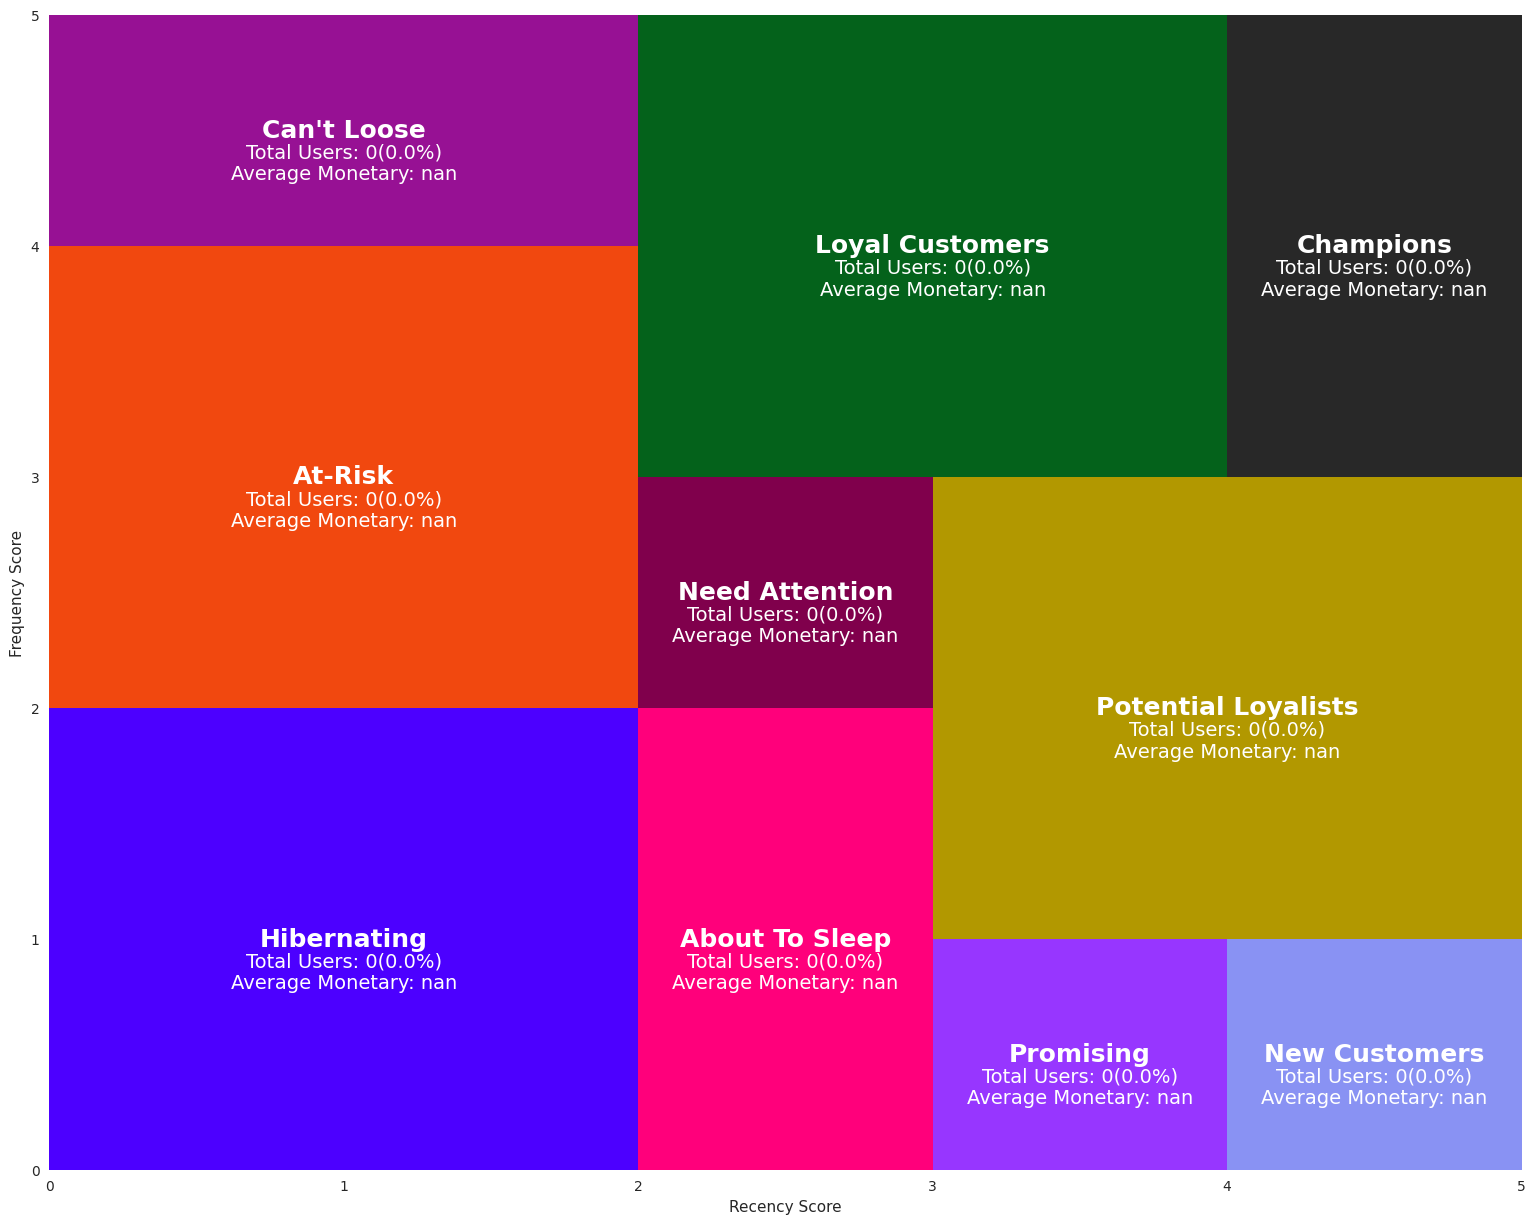

In [11]:
fig, ax = plt.subplots(figsize = (19, 15))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)
    
    users = df_rfm[df_rfm.segment == key].shape[0]
    users_percentage = (df_rfm[df_rfm.segment == key].shape[0] / df_rfm.shape[0]) * 100
    avg_monetary = df_rfm[df_rfm.segment == key]["Monetary"].mean()
    
    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))
    
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    
    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")
    
sns.despine(left = True, bottom = True)
plt.show()

In [12]:
top10 = df_rfm['segment'].value_counts()[:10]
fig = px.bar(y=top10.values, 
             x=top10.index,  
             text_auto=True,
             color = top10.index,
             title= 'RFM',
            template= 'ggplot2' )

fig.show()

In [ ]:
import gc
gc.collect()

## K-Means Clustering

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# df_rfm = pd.read_csv('/kaggle/working/RFM.csv')

In [15]:
rfm_table = df_rfm.copy()
rfm_clustering = rfm_table.copy()

for col in ["Recency", "Frequency", "Monetary"]:
    # 로그 변환하기 전에 0 또는 음수 값이 있는지 확인
#     if any(rfm_clustering[col] <= 0):
#         # 0이나 음수 값을 피하기 위해 1을 더한 후 로그 변환
#         rfm_clustering[col] = np.log1p(rfm_clustering[col])
#     else:
#         rfm_clustering[col] = np.log(rfm_clustering[col])

    # 스케일링
    scaler = StandardScaler()
    rfm_clustering[col] = scaler.fit_transform(rfm_clustering[col].values.reshape(-1, 1))

rfm_melted = pd.melt(rfm_clustering, value_vars=["Recency", "Frequency", "Monetary"],
                     var_name="RFM", value_name="Value")

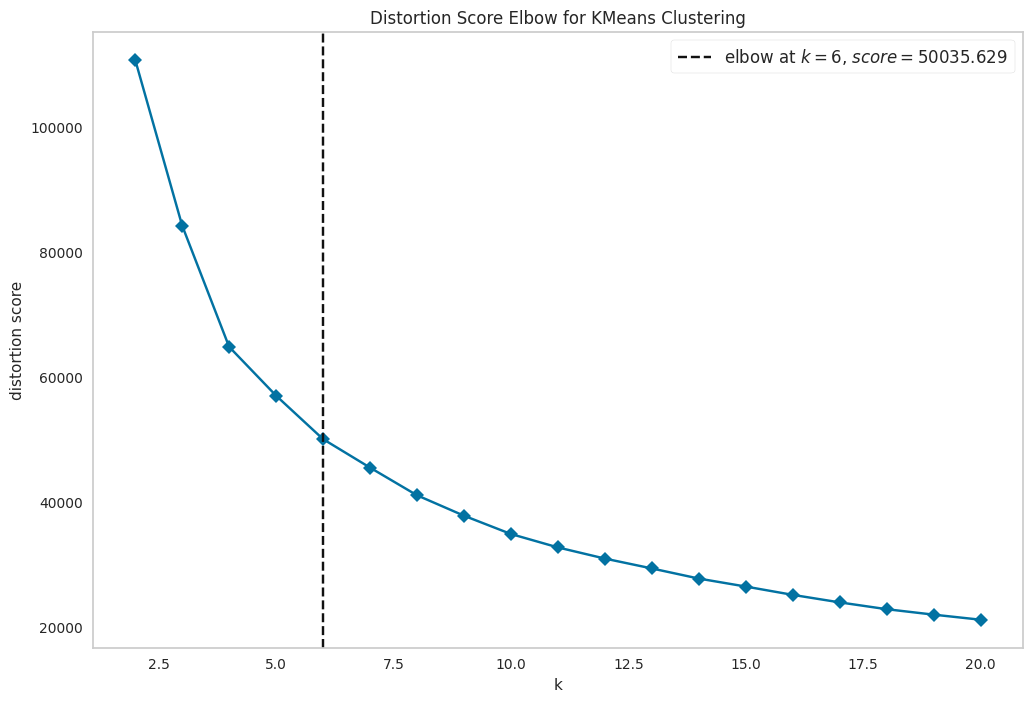

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
features = ["Recency", "Frequency", "Monetary"]

kmeans_ = KMeans(random_state = 101, init='k-means++', n_init = 10)

fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(False)

visualizer = KElbowVisualizer(kmeans_, k = (2, 21), timings = False)

visualizer.fit(rfm_clustering[features]) 
visualizer.show()

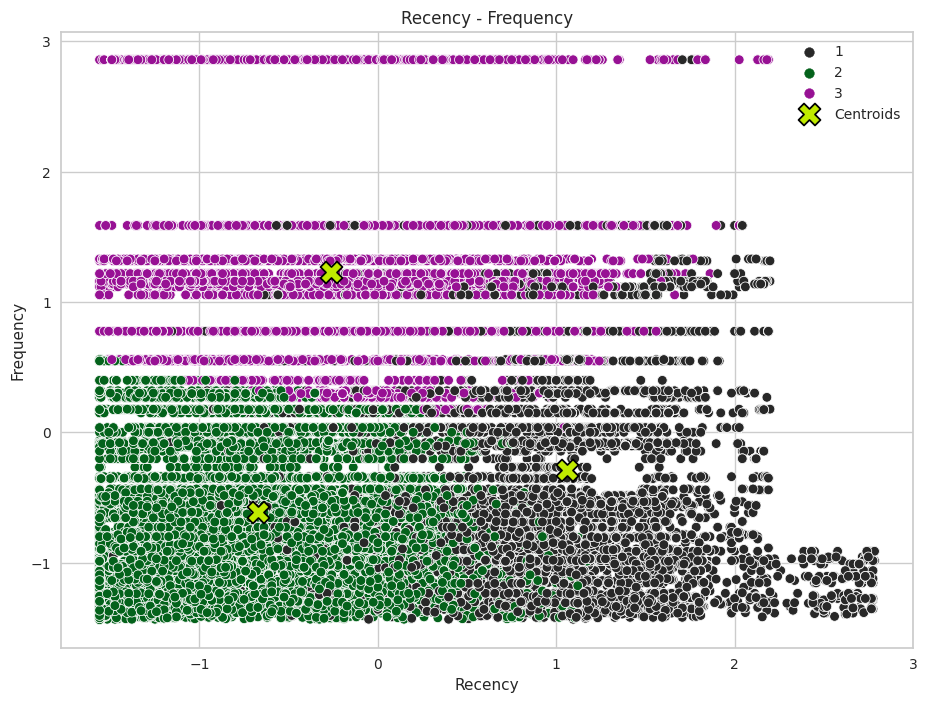

In [17]:
from itertools import combinations

kmeans = KMeans(n_clusters = 3, random_state = 101, init='k-means++', n_init = 10) 
kmeans.fit(rfm_clustering[features])
cluster = (kmeans.labels_)+1

fig= plt.subplots(figsize = (11, 8))

palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for i, feature in list(enumerate(combinations(["Recency", "Frequency"], 2))):
    # 2개의 요소를 포함하는 모든 조합(combinations) 생성(ex: ('R', 'M'), ('M', 'R')). 순서가 달라도 같은 조합으로 간주. -> enumerate로 인덱스와 함께 열거

    sns.scatterplot(x = rfm_clustering[feature[0]], y = rfm_clustering[feature[1]], hue = cluster, 
                    palette = palette[: len(set(cluster))], ).set_title(feature[0] + " - " + feature[1])

    sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1],
                    s = 250, color = '#C0EB00', label = 'Centroids', marker = "X", edgecolor = "black")

plt.show()

- Recency: 낮을 수록 예매주기 빠름
- Frequency: 낮을 수록 예매빈도 적음

In [18]:
rfm_clustering['cluster'] = cluster

In [72]:
rfm_clustering.head(3)

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Total_score,segment,cluster
0,18,121,70.0,0,2020,4,1,1.517090,-1.275730,-0.746958,1,1,1,11,3,휴면고객,1
1,53,35,30.0,1,2019,3,2,-0.146208,-0.532974,-0.826215,2,2,1,22,5,잠재고객,2
2,145,197,30.0,0,2022,0,2,0.974148,0.173551,0.085243,1,2,2,12,4,휴면가능성_type1,1


#### RF_predict + cluster merge

In [44]:
df_rf = pd.read_csv('/kaggle/input/rfm-13/k-rfm_13.csv')

In [20]:
rfm_rf = rfm_clustering.merge(df_rf, on = 'key', how = 'right')
rfm_rf.shape

(51179, 31)

In [74]:
rfm_rf.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
rfm_rf.to_csv('/kaggle/working/rfm_rf.csv', index=False)

In [73]:
rfm_rf.head()

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Total_score,segment,cluster,Unnamed: 0,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13
0,18,121,70.0,0,2020,4,1,1.517090,-1.275730,-0.746958,1,1,1,11,3,휴면고객,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0
1,53,35,30.0,1,2019,3,2,-0.146208,-0.532974,-0.826215,2,2,1,22,5,잠재고객,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,145,197,30.0,0,2022,0,2,0.974148,0.173551,0.085243,1,2,2,12,4,휴면가능성_type1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,285,201,50.0,0,2022,0,1,-0.749477,-0.656163,0.996701,3,1,3,31,9,새로운고객,2,3,1,1,1,1,1,1,1,1,0,0,0,0,0
4,293,16,20.0,1,2019,1,2,-1.025257,1.217033,-0.786587,3,3,1,33,7,단골고객,3,4,1,1,1,0,0,0,0,0,0,0,0,0,0


In [22]:
rfm_rf.groupby(['prediction_1'])['ID'].count()

prediction_1
0     2236
1    48943
Name: ID, dtype: int64

In [23]:
rfm_rf.groupby('cluster')['prediction_1'].count()

cluster
1    16574
2    20526
3    14079
Name: prediction_1, dtype: int64

In [24]:
rfm_rf[rfm_rf['prediction_1'] == 1].groupby('cluster')['prediction_1'].count()

cluster
1    16039
2    19484
3    13420
Name: prediction_1, dtype: int64

# Analysis

In [51]:
import pandas as pd
import numpy as np

In [75]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/working/rfm_rf.csv')
df.head(3)

,key,ID,나이,성별,공연년도,멤버십등급,공연요일,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Total_score,segment,cluster,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13
0,18,121,70.0,0,2020,4,1,1.517090,-1.275730,-0.746958,1,1,1,11,3,휴면고객,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1,53,35,30.0,1,2019,3,2,-0.146208,-0.532974,-0.826215,2,2,1,22,5,잠재고객,2,1,1,0,0,0,0,0,0,0,0,0,0,0
2,145,197,30.0,0,2022,0,2,0.974148,0.173551,0.085243,1,2,2,12,4,휴면가능성_type1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [76]:
predictions = [f'prediction_{i}' for i in range(1, 14)]
segment_sum = df.groupby('segment')[predictions].sum()
segment_sum['count'] = df.groupby('segment')['prediction_1'].count()

In [77]:
df.groupby('segment')['prediction_1'].count()

segment
단골고객           5468
새로운고객          6154
유인필요고객         5228
잠재고객           5838
충성고객_type1     6289
충성고객_type2     5472
휴면가능성_type1    5641
휴면가능성_type2    4937
휴면고객           6152
Name: prediction_1, dtype: int64

In [78]:
segment_sum

,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13,count
segment,,,,,,,,,,,,,,
단골고객,5154,4992,4551,4119,3516,2887,2491,1913,1303,1055,876,587,534,5468
새로운고객,5802,5599,5145,4682,3974,3293,2814,2231,1598,1282,986,649,561,6154
유인필요고객,5041,4917,4611,4348,3732,3153,2726,2324,1680,1377,1133,858,785,5228
잠재고객,5608,5504,5126,4733,4062,3506,2982,2496,1818,1544,1260,831,778,5838
충성고객_type1,6047,5913,5518,5014,4273,3606,3118,2578,1848,1551,1270,881,790,6289
충성고객_type2,5176,5022,4649,4184,3524,2955,2537,2043,1395,1131,894,559,517,5472
휴면가능성_type1,5439,5309,5007,4730,4066,3455,3024,2616,1903,1544,1291,915,833,5641
휴면가능성_type2,4711,4610,4284,3918,3356,2796,2396,1950,1393,1110,897,608,555,4937
휴면고객,5965,5847,5465,5124,4400,3739,3291,2774,2045,1668,1393,940,857,6152


In [79]:
col = ['1만원', '2만원', '3만원', '4만원', '5만원', '6만원', '7만원', '8만원', '9만원', '10만원', '11만원', '12만원', '13만원']
for i in range(1, 14):
    old_col = f'prediction_{i}'
    new_col = col[i-1]
    segment_sum.rename(columns = {old_col: new_col}, inplace=True)

In [29]:
segment_sum

,1만원,2만원,3만원,4만원,5만원,6만원,7만원,8만원,9만원,10만원,11만원,12만원,13만원,count
segment,,,,,,,,,,,,,,
단골고객,5154.0,4992.0,4551.0,4119.0,3516.0,2887.0,2491.0,1913.0,1303.0,1055.0,876.0,587.0,534.0,5468
새로운고객,5802.0,5599.0,5145.0,4682.0,3974.0,3293.0,2814.0,2231.0,1598.0,1282.0,986.0,649.0,561.0,6154
유인필요고객,5041.0,4917.0,4611.0,4348.0,3732.0,3153.0,2726.0,2324.0,1680.0,1377.0,1133.0,858.0,785.0,5228
잠재고객,5608.0,5504.0,5126.0,4733.0,4062.0,3506.0,2982.0,2496.0,1818.0,1544.0,1260.0,831.0,778.0,5838
충성고객_type1,6047.0,5913.0,5518.0,5014.0,4273.0,3606.0,3118.0,2578.0,1848.0,1551.0,1270.0,881.0,790.0,6289
충성고객_type2,5176.0,5022.0,4649.0,4184.0,3524.0,2955.0,2537.0,2043.0,1395.0,1131.0,894.0,559.0,517.0,5472
휴면가능성_type1,5439.0,5309.0,5007.0,4730.0,4066.0,3455.0,3024.0,2616.0,1903.0,1544.0,1291.0,915.0,833.0,5641
휴면가능성_type2,4711.0,4610.0,4284.0,3918.0,3356.0,2796.0,2396.0,1950.0,1393.0,1110.0,897.0,608.0,555.0,4937
휴면고객,5965.0,5847.0,5465.0,5124.0,4400.0,3739.0,3291.0,2774.0,2045.0,1668.0,1393.0,940.0,857.0,6152


In [30]:
for i in col:
    segment_sum[f'비율_{i}'] = segment_sum[f'{i}'] / segment_sum['count']

In [31]:
segment_rate = segment_sum.drop(columns = col)
segment_rate = segment_rate.reset_index().T
segment_rate = segment_rate.rename(columns = segment_rate.iloc[0])

In [32]:
segment_rate = segment_rate.drop(segment_rate.index[0:2])
segment_rate.head(3)

,단골고객,새로운고객,유인필요고객,잠재고객,충성고객_type1,충성고객_type2,휴면가능성_type1,휴면가능성_type2,휴면고객
비율_1만원,0.942575,0.942801,0.964231,0.960603,0.96152,0.945906,0.964191,0.954223,0.969603
비율_2만원,0.912948,0.909815,0.940513,0.942789,0.940213,0.917763,0.941145,0.933765,0.950423
비율_3만원,0.832297,0.836042,0.881982,0.87804,0.877405,0.849598,0.887609,0.867733,0.888329


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=2, subplot_titles=segment_rate.columns)

# 서브플롯에 데이터 추가
for i, col in enumerate(segment_rate.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=segment_rate.index,
        y=segment_rate[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Price ratio by segment', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

#### 클러스터별

In [34]:
df.groupby('segment')[predictions].count()

,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13
segment,,,,,,,,,,,,,
단골고객,5468,5468,5468,5468,5468,5468,5468,5468,5468,5468,5468,5468,5468
새로운고객,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154
유인필요고객,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228
잠재고객,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838
충성고객_type1,6289,6289,6289,6289,6289,6289,6289,6289,6289,6289,6289,6289,6289
충성고객_type2,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472,5472
휴면가능성_type1,5641,5641,5641,5641,5641,5641,5641,5641,5641,5641,5641,5641,5641
휴면가능성_type2,4937,4937,4937,4937,4937,4937,4937,4937,4937,4937,4937,4937,4937
휴면고객,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152


In [35]:
# cluster_sum = df.groupby('cluster')[['prediction_1', 'prediction_2', 'prediction_3', 'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7', 'prediction_8']].sum()
# cluster_sum['size'] = df.groupby('cluster')['ID'].count()
# cluster_sum.rename(columns = {'size': 'raw', 'prediction_1': '7만원', 'prediction_2': '7만5천원', 'prediction_3': '8만원', 'prediction_4': '8만5천원', 'prediction_5': '9만원', 'prediction_6': '9만5천원', 'prediction_7': '10만원', 'prediction_8': '10만2천원'}, inplace = True)

# col = ['raw', '7만원', '7만5천원', '8만원', '8만5천원', '9만원', '9만5천원', '10만원', '10만2천원']
# for i in col:
#     cluster_sum[f'비율_{i}'] = cluster_sum[f'{i}'] / cluster_sum['raw']
    
# cluster_rate = cluster_sum.drop(columns = col)
# cluster_rate = cluster_rate.reset_index().T
# cluster_rate = cluster_rate.rename(columns = cluster_rate.iloc[0])
# ########

predictions = [f'prediction_{i}' for i in range(1, 14)]
cluster_sum = df.groupby('cluster')[predictions].sum()
cluster_sum['count'] = df.groupby('cluster')['prediction_1'].count()
col = ['1만원', '2만원', '3만원', '4만원', '5만원', '6만원', '7만원', '8만원', '9만원', '10만원', '11만원', '12만원', '13만원']
column_mapping  = {f'prediction_{i}': col[i-1] for i in range(1, 14)}
column_mapping['count'] = 'count'
cluster_sum.rename(columns=column_mapping, inplace=True)
for i in col:
    cluster_sum[f'비율_{i}'] = cluster_sum[f'{i}'] / cluster_sum['count']
cluster_rate = cluster_sum.drop(columns = col, axis=1)
cluster_rate = cluster_rate.T

In [36]:
cluster_rate

cluster,1.0,2.0,3.0
count,26016.000000,21839.000000,3324.000000
비율_1만원,0.965637,0.942763,0.972323
비율_2만원,0.945879,0.912359,0.956679
비율_3만원,0.891336,0.831906,0.902226
비율_4만원,0.840137,0.739549,0.855596
비율_5만원,0.727898,0.612024,0.782190
비율_6만원,0.624962,0.493887,0.705475
비율_7만원,0.547701,0.411099,0.647413
비율_8만원,0.458487,0.323687,0.580024
비율_9만원,0.323224,0.225331,0.497292


In [37]:
cluster_rate = cluster_rate.drop(cluster_rate.index[0:1])

In [38]:
cluster_rate

cluster,1.0,2.0,3.0
비율_1만원,0.965637,0.942763,0.972323
비율_2만원,0.945879,0.912359,0.956679
비율_3만원,0.891336,0.831906,0.902226
비율_4만원,0.840137,0.739549,0.855596
비율_5만원,0.727898,0.612024,0.782190
비율_6만원,0.624962,0.493887,0.705475
비율_7만원,0.547701,0.411099,0.647413
비율_8만원,0.458487,0.323687,0.580024
비율_9만원,0.323224,0.225331,0.497292
비율_10만원,0.260801,0.182060,0.451564


#### 비율별 수익계산

In [39]:
cluster_rate.index = range(10000, 10000 + len(cluster_rate) * 10000, 10000)

In [40]:
cluster_rate

cluster,1.0,2.0,3.0
10000,0.965637,0.942763,0.972323
20000,0.945879,0.912359,0.956679
30000,0.891336,0.831906,0.902226
40000,0.840137,0.739549,0.855596
50000,0.727898,0.612024,0.782190
60000,0.624962,0.493887,0.705475
70000,0.547701,0.411099,0.647413
80000,0.458487,0.323687,0.580024
90000,0.323224,0.225331,0.497292
100000,0.260801,0.182060,0.451564


In [41]:
cluster_rv = cluster_rate.mul(cluster_rate.index.astype(int), axis=0)
cluster_rv

cluster,1.0,2.0,3.0
10000,9656.365314,9427.629470,9723.225030
20000,18917.589176,18247.172490,19133.574007
30000,26740.083026,24957.186684,27066.787004
40000,33605.473555,29581.940565,34223.826715
50000,36394.910824,30601.218004,39109.506619
60000,37497.693727,29633.224965,42328.519856
70000,38339.099016,28776.958652,45318.892900
80000,36678.966790,25894.958560,46401.925391
90000,29090.175277,20279.774715,44756.317690
100000,26080.104551,18205.961811,45156.438026


#### 클러서터별 비율 그래프

In [42]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 1', 'Cluster 2', 'Cluster 3'])


# 서브플롯에 데이터 추가
for i, col in enumerate(cluster_rate.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=cluster_rate.index,
        y=cluster_rate[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Revenue ratio by cluster', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

#### 비율별 수익 그래프

In [43]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 1', 'Cluster 2', 'Cluster 3'])


# 서브플롯에 데이터 추가
for i, col in enumerate(cluster_rv.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=cluster_rv.index,
        y=cluster_rv[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Revenue by cluster', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

- 클러스터 1, 4, 5
- 클러스터 2, 6
- 클러스터 3

In [44]:
# def cluster_map(x):
#     cluster_mapping = {1: 1, 2: 2, 3:3, 4: 1, 5: 1, 6: 2}
#     return cluster_mapping[x]

# df.loc[:, 'cluster'] = df['cluster'].map(cluster_map)

In [45]:
df['cluster'].nunique()

3

In [46]:
#각 공연별 groupby 후, cluster별 count/cluster 총 count

In [47]:
con_code = pd.read_csv('/kaggle/input/caps1/df.csv', index_col = 0)
con_code = con_code[['key', '공연코드']]
df = df.merge(con_code, on='key', how='right')
df.head(3)

,key,ID,나이,성별,공연년도,멤버십등급,Recency,Frequency,Monetary,Recency_score,...,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13,공연코드_x,공연코드_y,공연코드
0,18,121.0,70.0,0.0,2020.0,4.0,1.51709,-1.27573,-0.746958,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,76.0,76
1,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221
2,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221


In [48]:
df.dropna(inplace=True)
df.shape

(51179, 32)

In [49]:
df.head(3)

,key,ID,나이,성별,공연년도,멤버십등급,Recency,Frequency,Monetary,Recency_score,...,prediction_7,prediction_8,prediction_9,prediction_10,prediction_11,prediction_12,prediction_13,공연코드_x,공연코드_y,공연코드
0,18,121.0,70.0,0.0,2020.0,4.0,1.517090,-1.275730,-0.746958,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,76.0,76
4,53,35.0,30.0,1.0,2019.0,3.0,-0.146208,-0.532974,-0.826215,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2059.0,2059.0,2059
8,145,197.0,30.0,0.0,2022.0,0.0,0.974148,0.173551,0.085243,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1997.0,1997.0,1997


In [50]:
# df.to_csv('/kaggle/working/final_rfm.csv', index=False)

In [51]:
count_cl = df.groupby(['공연코드_x'], as_index=False)['cluster'].count()

In [52]:
con_cluster

,key,공연코드_x,cluster_x,ID,cluster_y,cluster_rate
0,4174,3.0,2.0,1,453,0.002208
1,4525,3.0,1.0,1,453,0.002208
2,14463,3.0,2.0,1,453,0.002208
3,21203,3.0,2.0,1,453,0.002208
4,30176,3.0,1.0,1,453,0.002208
...,...,...,...,...,...,...
51174,1909969,2936.0,2.0,1,504,0.001984
51175,1913179,2936.0,1.0,1,504,0.001984
51176,1914333,2936.0,2.0,1,504,0.001984
51177,1917789,2936.0,2.0,1,504,0.001984


In [53]:
con_cluster = df.groupby(['key', '공연코드_x', 'cluster'], as_index=False)['ID'].count()
con_cluster = con_cluster.merge(count_cl, on='공연코드_x', how='right')
con_cluster['cluster_rate'] = con_cluster['ID']/ con_cluster['cluster_y']
con_cluster.groupby('cluster_x', as_index=False)['cluster_rate'].mean()

,cluster_x,cluster_rate
0,1.0,0.002035
1,2.0,0.003062
2,3.0,0.001256


In [54]:
con_cluster.head()

,key,공연코드_x,cluster_x,ID,cluster_y,cluster_rate
0,4174,3.0,2.0,1,453,0.002208
1,4525,3.0,1.0,1,453,0.002208
2,14463,3.0,2.0,1,453,0.002208
3,21203,3.0,2.0,1,453,0.002208
4,30176,3.0,1.0,1,453,0.002208


In [55]:
#cluster별 합/총 cluster 합
count_cl.sum()[1]

51179.0

In [56]:
con_cluster_rate = con_cluster.groupby(['cluster_x'],as_index=False)['key'].count()

In [57]:
con_cluster_rate['rate'] = con_cluster_rate['key']/count_cl.sum()[1]
con_cluster_rate.to_csv('/kaggle/working/cluster_rate.csv', index=False)

In [58]:
con_cluster_rate

,cluster_x,key,rate
0,1.0,26016,0.508333
1,2.0,21839,0.426718
2,3.0,3324,0.064949


In [59]:
# A공연 = 1:30% 2:40%, -----
# 전체공연에대한 mean()  1: % 2%
# ㄴ 좌석까지(좌석도 전체예매 data로)

#### 클러스터별 세그먼트 비율

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
ID_rate = df.groupby(['cluster'])[['ID']].count()
cluster_seg = df.groupby(['cluster', 'segment'], as_index=False)['ID'].count()
cluster_seg = cluster_seg.merge(ID_rate, on='cluster', how='right')
cluster_seg['seg_rate'] = cluster_seg['ID_x']/cluster_seg['ID_y']
cluster_seg.sort_values(['cluster', 'seg_rate'], ascending = True).groupby('cluster').tail(2)

,cluster,segment,ID_x,ID_y,seg_rate
6,1.0,휴면가능성_type1,4885,26016,0.187769
8,1.0,휴면고객,5785,26016,0.222363
10,2.0,새로운고객,4243,21839,0.194285
9,2.0,단골고객,4880,21839,0.223453
24,3.0,휴면가능성_type1,744,3324,0.223827
20,3.0,유인필요고객,751,3324,0.225933


#### 클러스터별 나이 비율

In [62]:
cluster_age = df.groupby(['cluster', '나이'],as_index=False)[['ID']].count()
cluster_age = cluster_age.merge(ID_rate, on='cluster', how='right')
cluster_age['age_rate'] = cluster_age['ID_x'] / cluster_age['ID_y']
cluster_age.head()

,cluster,나이,ID_x,ID_y,age_rate
0,1.0,10.0,173,26016,0.006650
1,1.0,20.0,2227,26016,0.085601
2,1.0,30.0,5405,26016,0.207757
3,1.0,40.0,5894,26016,0.226553
4,1.0,50.0,6512,26016,0.250308


In [63]:
pd.set_option('display.max_row', None)

In [97]:
cluster_age.sort_values('cluster', ascending = True).groupby('cluster')['나이'].mean()

cluster
1.0    45.0
2.0    45.0
3.0    45.0
Name: 나이, dtype: float64

#### 클러스터별 멤버쉽 비율

In [65]:
mem_size = df.groupby(['cluster', '멤버십등급'], as_index=False)['ID'].size()
mem_cnt = df.groupby(['cluster'], as_index=False)['ID'].count()
mem_cnt = mem_cnt.merge(mem_size, on='cluster', how='right')
mem_cnt['mem_rate'] = mem_cnt['size']/mem_cnt['ID']
mem_cnt.head()

,cluster,ID,멤버십등급,size,mem_rate
0,1.0,26016,0.0,6167,0.237046
1,1.0,26016,1.0,2618,0.100630
2,1.0,26016,2.0,3196,0.122847
3,1.0,26016,3.0,3919,0.150638
4,1.0,26016,4.0,9899,0.380497


In [145]:
mem_cnt.sort_values(['cluster', 'mem_rate'], ascending=True).groupby('cluster').tail(3)

,cluster,ID,멤버십등급,size,mem_rate
3,1.0,26016,3.0,3919,0.150638
0,1.0,26016,0.0,6167,0.237046
4,1.0,26016,4.0,9899,0.380497
7,2.0,21839,1.0,4184,0.191584
6,2.0,21839,0.0,5820,0.266496
10,2.0,21839,4.0,7321,0.335226
15,3.0,3324,3.0,425,0.127858
12,3.0,3324,0.0,610,0.183514
16,3.0,3324,4.0,1671,0.502708


#### 클러스터별 성별 비율

In [67]:
gen_cnt = df.groupby('cluster',as_index=False)['성별'].count()
df.groupby('cluster',as_index=False)['성별'].count()

,cluster,성별
0,1.0,26016
1,2.0,21839
2,3.0,3324


In [68]:
gen = df.groupby(['cluster', '성별'],as_index=False)['ID'].count()
gen = gen.merge(gen_cnt, on='cluster', how='right')
gen['gen_rate'] = gen['ID']/gen['성별_y']
gen.groupby('cluster').tail(1)

,cluster,성별_x,ID,성별_y,gen_rate
1,1.0,1.0,16836,26016,0.647140
3,2.0,1.0,14229,21839,0.651541
5,3.0,1.0,2271,3324,0.683213


#### 클러스터별 평균 RFM

In [69]:
df.groupby(['cluster'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
cluster,,,
1.0,0.520672,-0.176485,0.195766
2.0,-0.709352,0.169088,-0.624774
3.0,0.585363,0.270371,2.572623


#### 클러스터별 평균 요일

In [134]:
dow = df.groupby(['cluster', '공연요일'], as_index=False)['ID'].count()

In [135]:
dow_cnt = df.groupby(['cluster'], as_index=False)['공연요일'].count()

In [136]:
dow = dow.merge(dow_cnt, on = 'cluster', how='right')
dow

,cluster,공연요일_x,ID,공연요일_y
0,1,1,1940,16574
1,1,2,1899,16574
2,1,3,2353,16574
3,1,4,2000,16574
4,1,5,4159,16574
5,1,6,4223,16574
6,2,1,4667,20526
7,2,2,2411,20526
8,2,3,2396,20526
9,2,4,1715,20526


In [138]:
dow['rate'] = dow['ID']/dow['공연요일_y']
dow

,cluster,공연요일_x,ID,공연요일_y,rate
0,1,1,1940,16574,0.117051
1,1,2,1899,16574,0.114577
2,1,3,2353,16574,0.141969
3,1,4,2000,16574,0.120671
4,1,5,4159,16574,0.250935
5,1,6,4223,16574,0.254797
6,2,1,4667,20526,0.227370
7,2,2,2411,20526,0.117461
8,2,3,2396,20526,0.116730
9,2,4,1715,20526,0.083553


In [144]:
dow.sort_values(['cluster', 'rate'], ascending = True).groupby('cluster').tail(3)

,cluster,공연요일_x,ID,공연요일_y,rate
2,1,3,2353,16574,0.141969
4,1,5,4159,16574,0.250935
5,1,6,4223,16574,0.254797
10,2,5,3568,20526,0.173828
6,2,1,4667,20526,0.227370
11,2,6,5769,20526,0.281058
12,3,1,2604,14079,0.184956
16,3,5,2987,14079,0.212160
17,3,6,3923,14079,0.278642
